**Introdução**

Em cooperativas agrícolas de pequeno porte, a classificação dos grãos é realizada manualmente por especialistas, o que pode ser demorado e sujeito a erros humanos. Com o avanço do aprendizado de máquina, é possível automatizar esse processo, aumentando a eficiência e a precisão da classificação.

**Objetivo**

Desenvolver um modelo de aprendizado de máquina que classifique variedades de grãos de trigo com base em suas características físicas.

O dataset pode ser encontrado no link a seguir: https://archive.ics.uci.edu/dataset/236/seeds

**O conjunto de dados contém medições de 210 amostras de grãos de trigo pertencentes a três variedades diferentes:**

- Kama
- Rosa
- Canadian

**Atributos do conjunto de dados:**
- **Área:** medida da área do grão.
- **Perímetro:** comprimento do contorno do grão.
- **Compacidade:** calculada como 
- **Comprimento do Núcleo:** comprimento do eixo principal da elipse equivalente ao grão.
- **Largura do Núcleo:** comprimento do eixo secundário da elipse.
- **Coeficiente de Assimetria:** medida da assimetria do grão.
- **Comprimento do Sulco do Núcleo:** comprimento do sulco central do grão.

In [1]:
# Importação de todas as biliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit, StratifiedKFold, cross_val_score
from scipy.stats import randint
from sklearn.inspection import permutation_importance
from joblib import dump

In [2]:
# Delimiter irá definir o separador de cada dado qualquer quantidade de espaço em branco (r"\s+")
df = pd.read_csv('seeds_dataset.txt', delimiter=r"\s+", header=None)

# Definindo o nome das colunas
header = ['area', 'perimeter', 'compactness', 'core_length', 'core_width', 'asymmetry_coefficient', 'core_groove_length', 'target']
df.columns = header

df.head()

,area,perimeter,compactness,core_length,core_width,asymmetry_coefficient,core_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Não há dados nulos/ausentes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   core_length            210 non-null    float64
 4   core_width             210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   core_groove_length     210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
df.describe()

,area,perimeter,compactness,core_length,core_width,asymmetry_coefficient,core_groove_length,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'perimeter'}>,
        <Axes: title={'center': 'compactness'}>],
       [<Axes: title={'center': 'core_length'}>,
        <Axes: title={'center': 'core_width'}>,
        <Axes: title={'center': 'asymmetry_coefficient'}>],
       [<Axes: title={'center': 'core_groove_length'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

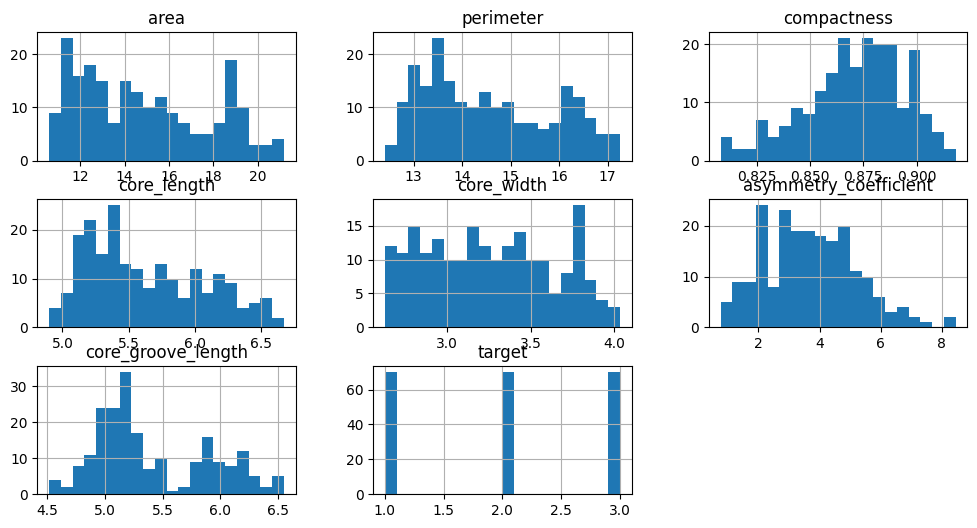

In [5]:
df.hist(figsize=(12,6), bins=20)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'area'),
  Text(1, 0, 'perimeter'),
  Text(2, 0, 'compactness'),
  Text(3, 0, 'core_length'),
  Text(4, 0, 'core_width'),
  Text(5, 0, 'asymmetry_coefficient'),
  Text(6, 0, 'core_groove_length'),
  Text(7, 0, 'target')])

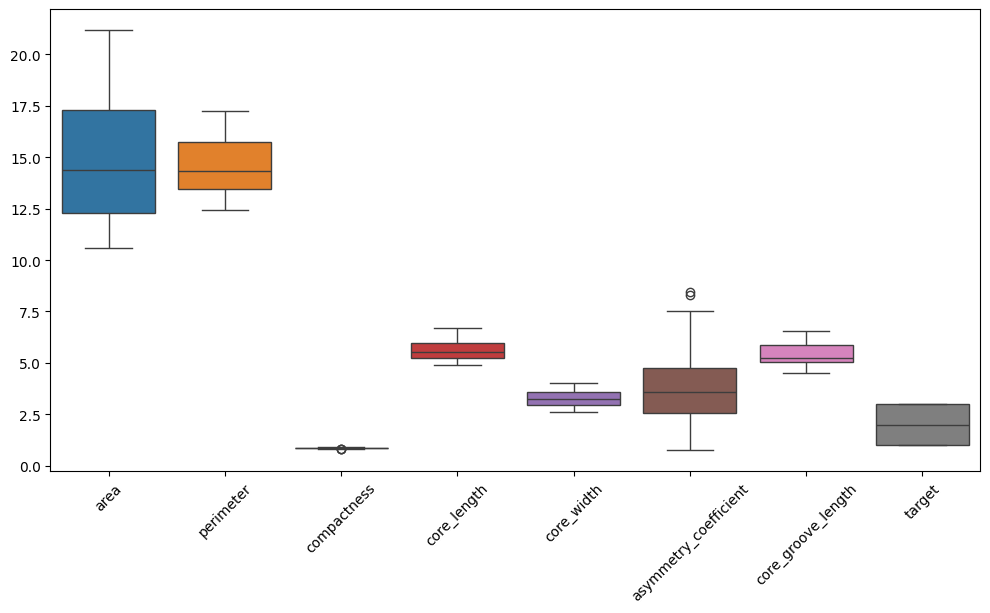

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

<Axes: >

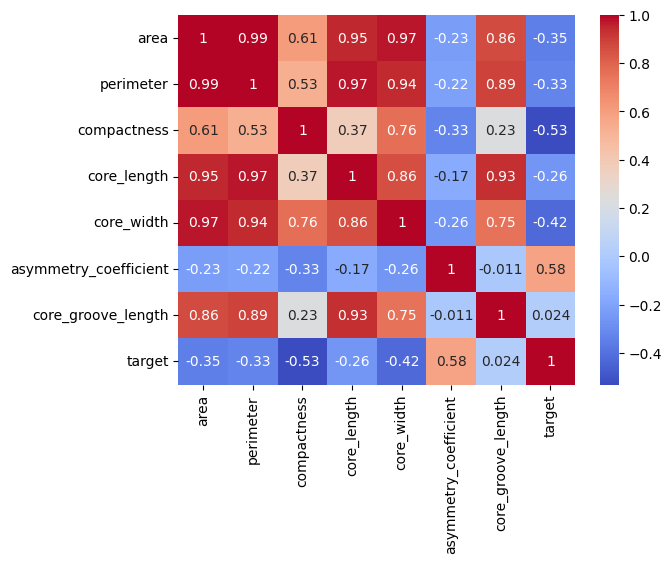

In [7]:
corr = df.corr()

# Matriz de Correlação
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

No gráfico de dispersão abaixo com algumas características é possível observar *correlações positivas* entre as variáveis, onde baseado em suas classes (variável alvo) estão agrupados.

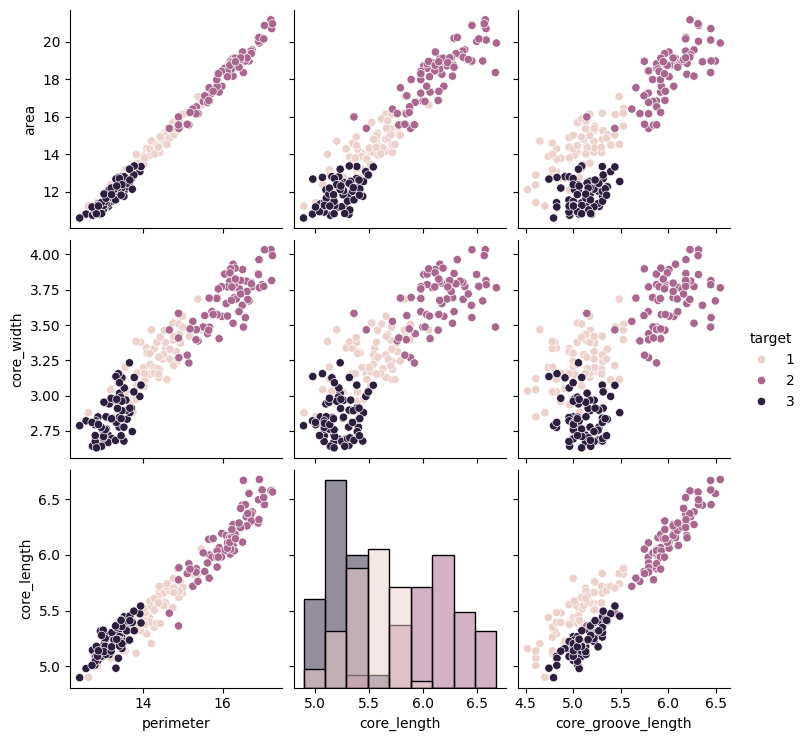

In [8]:
# Gráfico de dispersão com algumas variáveis que apresentam correlações significativas
# O parametro hue='target' colore cada ponto no gráfico baseado nas classes
sns.pairplot(data=df, 
             y_vars=['area', 'core_width', 'core_length'], 
             x_vars=['perimeter', 'core_length', 'core_groove_length'], 
             hue='target', 
             diag_kind='hist')

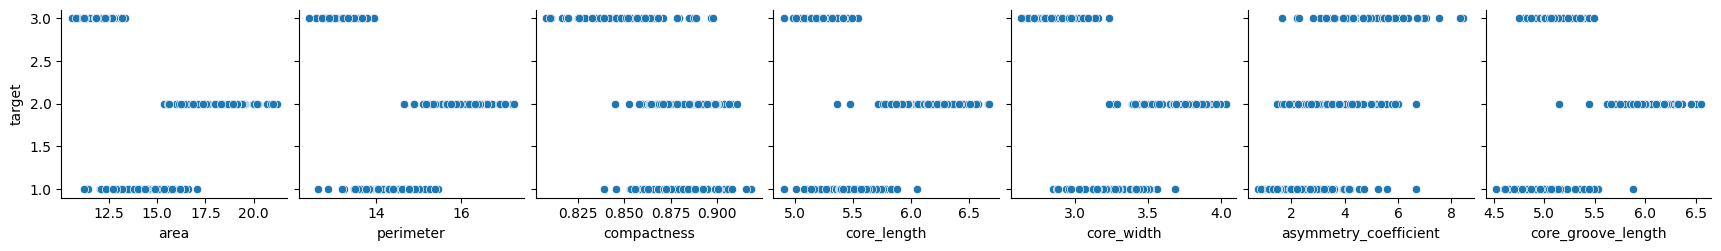

In [9]:
# Gráfico de dispersão para analisar a relação de cada atributo com a variável alvo
sns.pairplot(data=df, y_vars='target', x_vars=df.drop('target', axis=1).columns)

Os dados estão balanceados, há 70 amostras para cada tipo de grão.

In [10]:
# Verificando o balanceamento dos dados
df['target'].value_counts()

target
1    70
2    70
3    70
Name: count, dtype: int64

**Separando as características (X) dos rótulos (y)**

In [11]:
X = df.drop('target', axis=1)
y = df['target']

### Separação dos dados em treino e teste

In [12]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=SEED)

### Normalização (Pré processamento)

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinamento e teste dos modelos

In [14]:
def view_predict_scores(predicts, y_true):
    accuracy = accuracy_score(y_true, predicts)
    print(f'Acurácia: {accuracy*100:.2f}%')

    recall = recall_score(y_true, predicts, average='macro')
    print(f'Recall: {recall*100:.2f}%')

    precision = precision_score(y_true, predicts, average='macro')
    print(f'Precisão: {precision*100:.2f}%')

    f1_score_ = f1_score(y_true, predicts, average='macro')
    print(f'F1 Score: {f1_score_*100:.2f}%')

labels = ['Kama', 'Rosa', 'Canadian']

**Árvore de Decisão**

Dados fora de escala não afetam a *Árvore de Decisão* nem a *Floresta Aleatória*

Acurácia: 88.10%
Recall: 88.10%
Precisão: 88.36%
F1 Score: 87.66%


<Axes: >

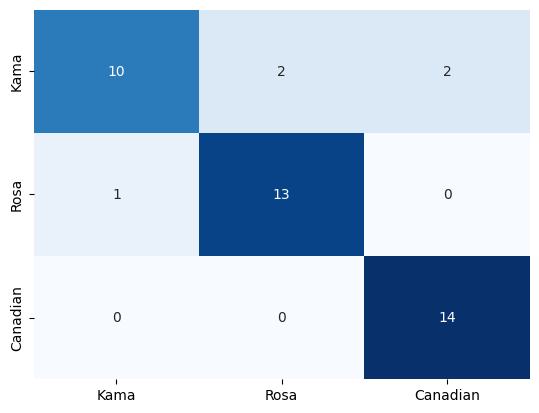

In [15]:
model_dt = DecisionTreeClassifier(random_state=SEED)
model_dt.fit(X_train, y_train)

predict_dt = model_dt.predict(X_test)
view_predict_scores(predict_dt, y_test)

cm = confusion_matrix(y_test, predict_dt)

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

**Floresta Aleatória**

Acurácia: 90.48%
Recall: 90.48%
Precisão: 91.90%
F1 Score: 90.07%


<Axes: >

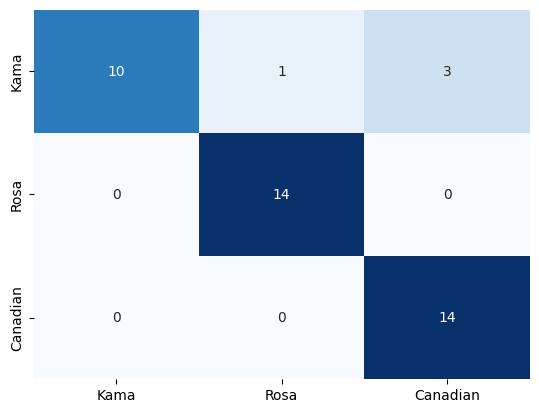

In [16]:
model_rf = RandomForestClassifier(random_state=SEED)
model_rf.fit(X_train, y_train)

predict_rf = model_rf.predict(X_test)
view_predict_scores(predict_rf, y_test)

cm = confusion_matrix(y_test, predict_rf)

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

**SVC**

Acurácia: 90.48%
Recall: 90.48%
Precisão: 91.67%
F1 Score: 90.00%


<Axes: >

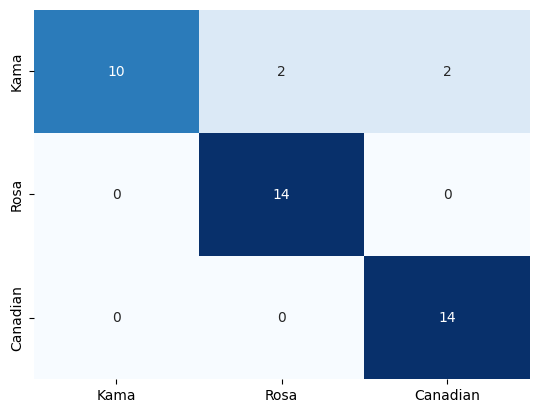

In [17]:
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

predict_svc = model_svc.predict(X_test_scaled)
view_predict_scores(predict_svc, y_test)

cm = confusion_matrix(y_test, predict_svc)

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

**KNN**

Acurácia: 90.48%
Recall: 90.48%
Precisão: 91.67%
F1 Score: 90.00%


<Axes: >

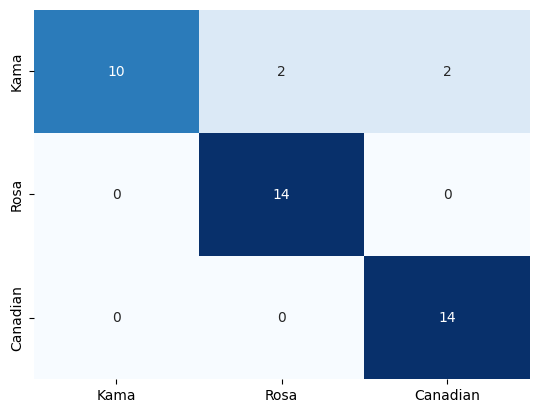

In [18]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

predict_knn = model_knn.predict(X_test_scaled)
view_predict_scores(predict_knn, y_test)

cm = confusion_matrix(y_test, predict_knn)

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

### Pontos a se pensar no modo como testamos e treinamos os modelos

Pelo fato dos algorítmos de *Árvore de Decisão* e *Floresta aleatória* poderem envolver componentes aleatórios no processo de treino, como a ordem das amostras ou o processo de divisão por nós. Por mais que definimos um *random_state* no processo de split dos dados nos algoritmos mencionados, é importante considerarmos que estamos lidando com aleatoriedade na hora da divisão dos dados para teste e treinamento.

Para garantirmos uma maior estabilidade das métricas no processo de treino e teste, podemos considerar realizar uma **validação cruzada**, para testar partições específicas dos nossos dados e validar a performance do modelo com mais acertividade.

Iremos realizar a **Validação Cruzada** com *StratifiedKFold* ou *StratifiedShuffleSplit* para a divisão dos dados de treino e teste, pois resultou em melhor performance nos modelos.

**Por que realizar validação cruzada?**

Fazendo o processo de apenas um treino e um teste, podemos estar correndo o risco de estarmos sendo muito otimistas em relação a performance do nosso modelo, e por isso, iremos realizar esse processo (treino e teste) diversas *K* vezes (KFold). A ideia da validação cruzada indica o que esperar do modelo, porém não treina o modelo final, apenas realiza a validação.


In [19]:
def view_cross_validate_scores(results):
    mean = results['test_score'].mean()
    std = results['test_score'].std()
    train_mean = results['train_score'].mean()

    print(f'Acurácia média treino: {train_mean*100:.2f}%')
    print(f'Acurácia média teste: {mean*100:.2f}%')
    print(f'Intervalo de acurácia com validação cruzada: {(mean - 2 * std)*100:.2f}% // {(mean + 2 * std)*100:.2f}%')

**Realizando Validação Cruzada**

**Árvore Aleatória**

In [20]:
model_dt = DecisionTreeClassifier(max_depth = 3, random_state=SEED) # Árvore de decisão não é afetada por dados fora de escala

results = cross_validate(model_dt, X, y, cv=StratifiedShuffleSplit(n_splits=10, random_state=SEED), return_train_score=True)
view_cross_validate_scores(results)

Acurácia média treino: 95.29%
Acurácia média teste: 90.48%
Intervalo de acurácia com validação cruzada: 81.96% // 98.99%


**Floresta Aleatória**

In [21]:
model_rf = RandomForestClassifier(max_depth=3, random_state=SEED)

results = cross_validate(model_rf, X, y, cv=StratifiedShuffleSplit(n_splits=10, random_state=SEED), return_train_score=True)
view_cross_validate_scores(results)

Acurácia média treino: 95.34%
Acurácia média teste: 92.38%
Intervalo de acurácia com validação cruzada: 81.78% // 102.99%


**SVC**

Para algorítimos como o SVC, uma pipeline para realizar a normalização dos dados é interessante, pois aumenta as métricas em até 10%.

In [22]:
pipeline_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('estimator', SVC())
])

results = cross_validate(pipeline_svc, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED), return_train_score=True)
view_cross_validate_scores(results)

Acurácia média treino: 95.08%
Acurácia média teste: 92.86%
Intervalo de acurácia com validação cruzada: 83.10% // 102.62%


**KNN**

Da mesma forma, realizaremos a normalização.

In [23]:
pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier())
])

results = cross_validate(pipeline_knn, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED), return_train_score=True)
view_cross_validate_scores(results)

#df_results = pd.DataFrame(results)
#df_results.sort_values('test_score', ascending=False)

Acurácia média treino: 95.87%
Acurácia média teste: 92.86%
Intervalo de acurácia com validação cruzada: 79.90% // 105.81%


### Validação Cruzada com busca de Hiperparâmetros

Agora, além de realizar a validação cruzada, iremos realizar também uma busca de hiperparâmetros com validação cruzada com algorítmos de busca em grade (GridSearchCV) e aleatórias (RandomizedSearchCV).

Antes de qualquer coisa, vamos criar uma classe para fazer todo esse processo de forma mais automatizada.

In [24]:
# Primeiramente iremos criar uma função que irá exibir os scores baseado na média e desvio padrão da validação cruzada aninhada
def view_cross_val_scores(scores):
    media = scores.mean() * 100
    desvio_padrao = scores.std() * 100
    print(f'Acurácia Médio: {media:.2f}%')
    print(f'Intervalo: {(media - 2 * desvio_padrao):.2f}% // {(media + 2 * desvio_padrao):.2f}')

In [25]:
# Classe para automatizar o processo de validação cruzada e otimização de parâmetros
class Model_ML:
    def __init__(self, estimator):
        self.estimator = estimator
        self.search = None
    
    # Algorítimo de busca aleatória
    def random_search(self, params, cv = 10, n_iter = 16, seed = 42):
        self.search = RandomizedSearchCV(self.estimator, 
                            params, 
                            cv=cv,
                            scoring='accuracy',
                            random_state=seed,
                            n_iter=n_iter,
                            n_jobs=-1)
    
    # Algorítimo de busca em grid
    def grid_search(self, params, cv = 10):
        self.search = GridSearchCV(self.estimator,
                      params,
                      scoring='accuracy',
                      cv=cv, 
                      n_jobs=-1)

    # Treina o algorítimo de busca com validação cruzada
    def training(self, x, y):
        self.search.fit(x, y)

    # Validação Cruzada Aninhada (Após o processo de treino e teste e busca de hiperparâmetros)
    def cross_val_score(self, x, y, cv = 10):
        scores = cross_val_score(self.search, x, y, cv=cv)
        view_cross_val_scores(scores)

**Árvore de Decisão**

In [26]:
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', DecisionTreeClassifier(random_state=SEED))
])

params = {
    'estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    'estimator__criterion': ['gini', 'entropy', 'log_loss']
}

model_dt_p = Model_ML(pipeline)
cv = StratifiedShuffleSplit(n_splits=5, random_state=SEED) # random_state para garantir a reprodutibilidade da divisão dos dados

# Realiza a busca em grid de hiperparâmetros com validação cruzada
model_dt_p.grid_search(params, cv)
model_dt_p.training(X, y)

# Validação Cruzada Aninhada para validação do modelo
model_dt_p.cross_val_score(X, y, cv)

# Modelo com melhor score
print(f'Melhor Score: {model_dt_p.search.best_score_*100:.2f}%')

Acurácia Médio: 89.52%
Intervalo: 85.71% // 93.33
Melhor Score: 93.33%


**Floresta Aleatória**

In [27]:
# Criação do pipeline de normalização junto com o estimador, será usado posteriormente
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', RandomForestClassifier(random_state=SEED))
])

# Já que o estimador está dentro de uma pipeline, os parâmetros precisam estar com o prefixo (estimator__)
params = {
    'estimator__n_estimators': randint(100,201), # Quantidade de árvores que serão criadas na floresta aleatória
    'estimator__max_depth': randint(2,20), # Profundidade das árvores (complexidade)
    'estimator__criterion': ['gini', 'entropy', 'log_loss']
}

model_rf_p = Model_ML(pipeline)
cv = StratifiedShuffleSplit(n_splits=5, random_state=SEED) # random_state para garantir a reprodutibilidade da divisão dos dados

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model_rf_p.random_search(params, cv)
model_rf_p.training(X, y)

# Validação Cruzada Aninhada para validação do modelo
model_rf_p.cross_val_score(X, y, cv)

# Modelo com melhor score
print(f'Melhor Score: {model_rf_p.search.best_score_*100:.2f}%')

c:\Users\DIOGO-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Acurácia Médio: 92.38%
Intervalo: 82.67% // 102.09
Melhor Score: 93.33%


**SVC**

In [28]:
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', SVC())
])

params = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.01, 0.1, 1],
    'estimator__kernel': ['linear', 'rbf']
}

model_svc_p = Model_ML(pipeline)
cv = StratifiedShuffleSplit(n_splits=5, random_state=SEED)

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model_svc_p.random_search(params, cv)
model_svc_p.training(X, y)

# Validação Cruzada Aninhada para validação do modelo
model_svc_p.cross_val_score(X, y, cv)

# Modelo com melhor score
print(f'Melhor Score: {model_svc_p.search.best_score_*100:.2f}%')

Acurácia Médio: 91.43%
Intervalo: 84.30% // 98.56
Melhor Score: 95.24%


**KNN**

In [29]:
pipeline = Pipeline(steps=[
    ('normalization', MinMaxScaler()),
    ('estimator', KNeighborsClassifier())
])

params = {
    'estimator__n_neighbors': randint(1, 50),            # Número de vizinhos entre 1 e 50
    'estimator__weights': ['uniform', 'distance'],       # Tipos de peso para os vizinhos
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski'],  # Métricas de distância
    'estimator__leaf_size': randint(30, 60),             # Tamanho da folha
    'estimator__p': [1, 2],                              # Potência para a distância Minkowski
    'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo de busca
}

model_knn_p = Model_ML(pipeline)
cv = StratifiedShuffleSplit(n_splits=5, random_state=SEED)

# Realiza a busca aleatória de hiperparâmetros com validação cruzada
model_knn_p.random_search(params, cv)
model_knn_p.training(X, y)

# Validação Cruzada Aninhada para validação do modelo
model_knn_p.cross_val_score(X, y, cv)

# Modelo com melhor score
print(f'Melhor Score: {model_knn_p.search.best_score_*100:.2f}%')

# Verificar a média do score de teste para cada um dos modelos
#df_cv_results = pd.DataFrame(model.search.cv_results_)
#df_cv_results[['mean_test_score', 'rank_test_score']].sort_values('mean_test_score', ascending=False).head()

Acurácia Médio: 92.38%
Intervalo: 84.76% // 100.00
Melhor Score: 96.19%


### Interpretação dos resultados

Por mais que os modelos que testamos tem uma performance semelhante entre si, os modelos **SVC** e **KNN** se sobressairam.

Iremos realizar algumas análises para destacar a importância das variáveis na classificação das variedades de grãos com alguns dos modelos criados.

**Árvore de Decisão**

No modelo abaixo é possível observar que as features *área* e *comprimento do sulco do núcleo* tem uma grande importância para classificar os grãos. Os outros atributos tem pouca influência sobre a classificação.

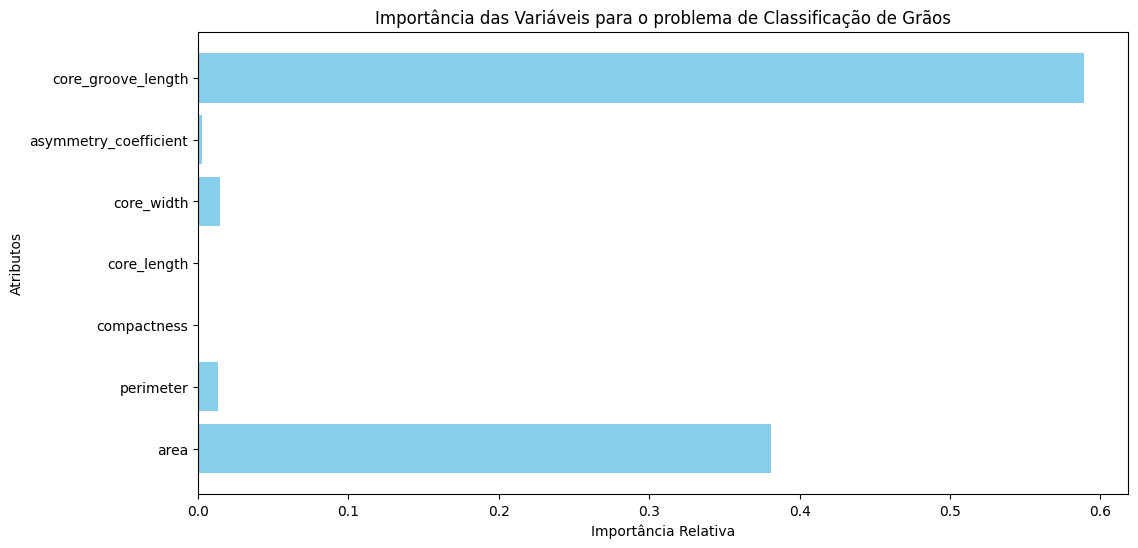

In [30]:
best_model_dt = model_dt_p.search.best_estimator_.named_steps['estimator']

plt.figure(figsize=(12,6))
plt.barh(X.columns, best_model_dt.feature_importances_, color='skyblue')
plt.xlabel("Importância Relativa")
plt.ylabel("Atributos")
plt.title("Importância das Variáveis para o problema de Classificação de Grãos")
plt.show()

**Floresta Aleatória**

Diferentemente (e curiosamente) da *Árvore de Decisão*, neste modelo os grau de importância de cada feature está um pouco mais equilibrada, porém com uma semelhança: as mesmas features (area e core_groove_length) se sobressaem como variáveis de mais importância para a classificação neste modelo.

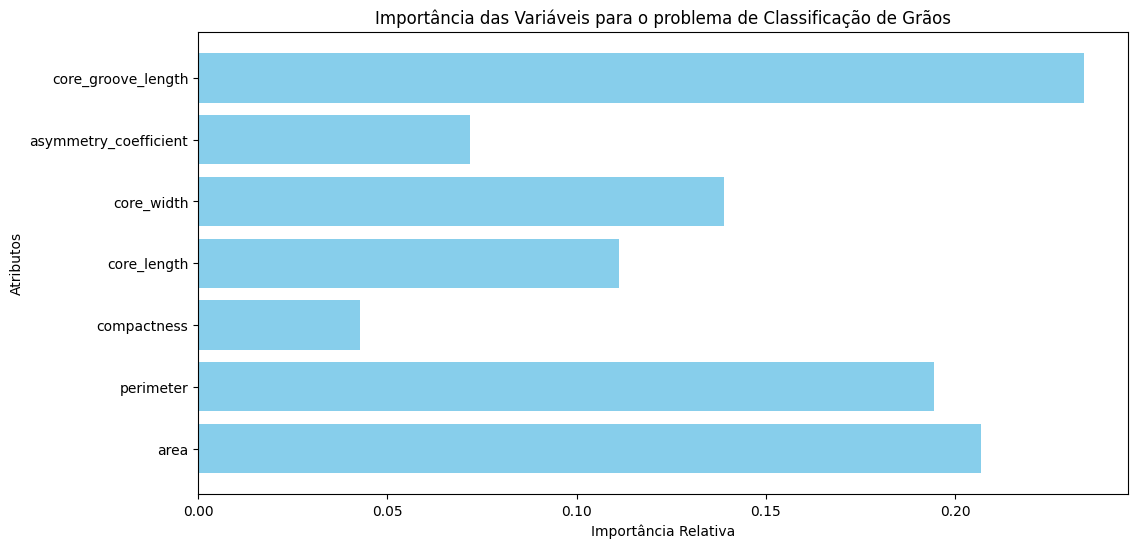

In [31]:
best_model_rf = model_rf_p.search.best_estimator_.named_steps['estimator']

plt.figure(figsize=(12,6))
plt.barh(X.columns, best_model_rf.feature_importances_, color='skyblue')
plt.xlabel("Importância Relativa")
plt.ylabel("Atributos")
plt.title("Importância das Variáveis para o problema de Classificação de Grãos")
plt.show()

**KNN (KNeighborsClassifier)**

Em comparação com os modelos anteriores, um atributo aparenta ter um grau de importância maior em todos os modelos análisados até o momento (core_groove_length).

**OBS.** O algorítmos *KNN* e *SVC* não possui o atributo *feature_importances_* como os modelos baseados em árvores. Porém, ainda é possível calcular a importância das variáveis com métodos como *Permutação de Importância* e *SHAP Values*, mas não poderemos realizar esta métrica com o modelo resultante do algorítmo de busca, pois pecisamos preservar um conjunto de teste que não foi utilizado no treinamento.

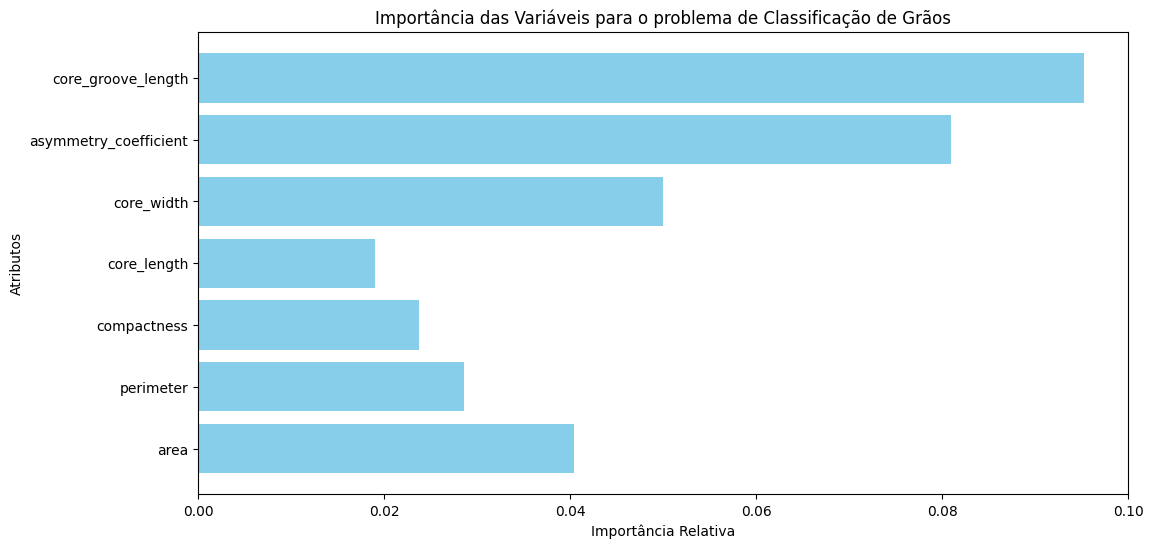

In [32]:
pipeline_knn.fit(X_train, y_train)

# Calcular importância das variáveis
permutation_result = permutation_importance(pipeline_knn, X_test, y_test, n_repeats=10, random_state=SEED)

plt.figure(figsize=(12,6))
plt.barh(X.columns, permutation_result.importances_mean, color='skyblue')
plt.xlabel("Importância Relativa")
plt.ylabel("Atributos")
plt.title("Importância das Variáveis para o problema de Classificação de Grãos")
plt.show()

**SVC**

Todos os modelos que testamos tem ao menos uma semelhança no grau de importância de cada variável para a classificação dos grãos, no caso dos modelos *SVC* e *KNN*, o atributo *core_groove_length* (comprimento do sulco do núcleo) tem uma importância significativa em todos os modelos que treinamos.

Portanto, é possível afirmar que este atributo específico contribui para a classificação em ambos os modelos. Porém, isso não significa que este é o único atributo importante para a classificação, mas em conjunto com outros fatores, este atributo é o que mais influencia na definição de um grão.

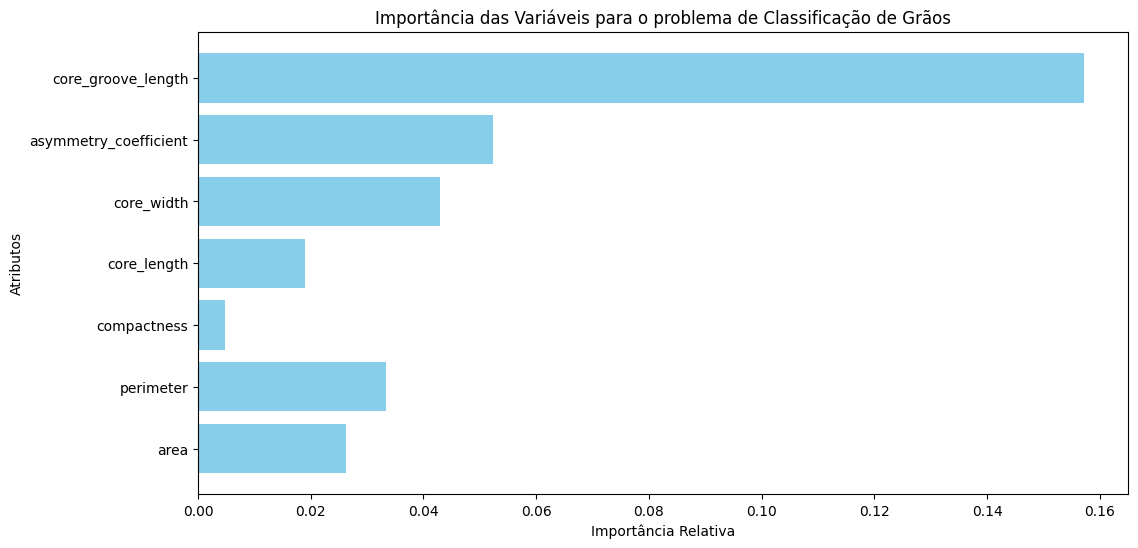

In [33]:
pipeline_svc.fit(X_train, y_train)

# Calcular importância das variáveis
permutation_result = permutation_importance(pipeline_svc, X_test, y_test, n_repeats=10, random_state=SEED)

plt.figure(figsize=(12,6))
plt.barh(X.columns, permutation_result.importances_mean, color='skyblue')
plt.xlabel("Importância Relativa")
plt.ylabel("Atributos")
plt.title("Importância das Variáveis para o problema de Classificação de Grãos")
plt.show()

### Comparação final para definir o melhor modelo baseado no *test_score* (acurácia)

Baseado no gráfico abaixo, podemos observar que ambos os modelos apresentam métricas semelhantes, porém o modelo *KNN* teve a melhor métrica (95.16% de acurácia). Iremos fazer o dump da pipeline deste modelo com a biblioteca *joblib* para produção.

([0, 1, 2, 3],
 [Text(0, 0, 'Árvore de Decisão'),
  Text(1, 0, 'Floresta Aleatória'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'KNN')])

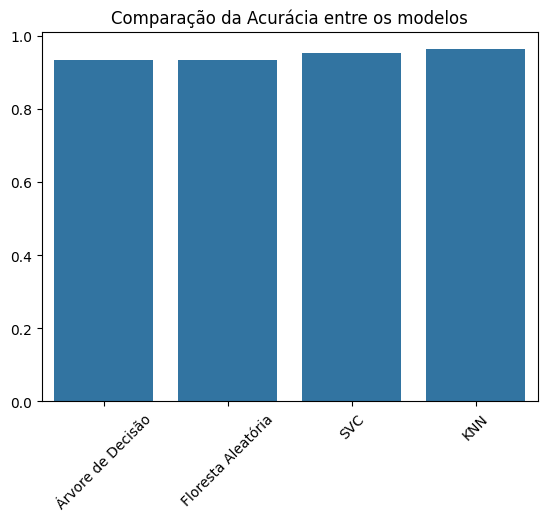

In [34]:
score_dt = model_dt_p.search.best_score_
score_rf = model_rf_p.search.best_score_
score_svc = model_svc_p.search.best_score_
score_knn = model_knn_p.search.best_score_

list_scores = [score_dt, score_rf, score_svc, score_knn]
columns = ['Árvore de Decisão', 'Floresta Aleatória', 'SVC', 'KNN']

plt.title("Comparação da Acurácia entre os modelos")
sns.barplot(x=columns, y=list_scores)
plt.xticks(rotation=45)

**OBS.** O pipeline contém todas as etapas necessárias, como o pré-processamento (normalização) com *MinMaxScaler*, portanto não é necessário realizar o pré-processamento de forma manual antes da previsão, pois o pipeline já cuida disso.

**Exemplo de uso**

```python
from joblib import load
import pandas as pd

pipeline_knn = load('knn_pipeline_model.joblib')

new_data = pd.read_csv('new_data_seeds.csv')

predictions = pipeline_knn.predict(new_data)
```

In [35]:
# Exportando o melhor modelo
best_pipeline_model = model_knn_p.search.best_estimator_

dump(best_pipeline_model, 'knn_pipeline_model.joblib')

print('Pipeline com o modelo salvo com sucesso.')

Pipeline com o modelo salvo com sucesso.
